<h2>Project 1</h2>

<h3>Joby John</h3>

<h3>Introduction</h3>

We will look at the flight routes network between airports in the United States. Each node represents an airport and edges between airports represents routes. We will use TimeZone as the categorical variable and 
test.

<h3>Data</h3>

airport.dat dataset contains geographic information of all the listed airport

routes.dat dataset contains geographic information of all the listed airports

<h4>Import libraries</h4>

In [1]:
# import libaries
import math
import json
import numpy as np
import pandas as pd
import networkx as nx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import stats

<h4>Reading airport data</h4>

We will read the airports data and keep airports in US only.  We will index on IATA code, a 3-characters unique identifier for airports.

In [2]:
names = ('id,name,city,country,iata,icao,lat,lon,'
         'alt,timezone,dst,tz,type,source').split(',')

airports = pd.read_csv(
    'airports1.csv',
    header=None,
    names=names,
    index_col=4,
    na_values='\\N')
airports_us = airports[airports['country'] ==
                       'United States']

airports_us.head()



,id,name,city,country,icao,lat,lon,alt,timezone,dst,tz,type,source
iata,,,,,,,,,,,,,
BTI,3411.0,Barter Island LRRS Airport,Barter Island,United States,PABA,70.134003,-143.582001,2.0,-9.0,A,America/Anchorage,airport,OurAirports
LUR,3413.0,Cape Lisburne LRRS Airport,Cape Lisburne,United States,PALU,68.875099,-166.110001,16.0,-9.0,A,America/Anchorage,airport,OurAirports
PIZ,3414.0,Point Lay LRRS Airport,Point Lay,United States,PPIZ,69.732903,-163.005005,22.0,-9.0,A,America/Anchorage,airport,OurAirports
ITO,3415.0,Hilo International Airport,Hilo,United States,PHTO,19.721399,-155.048004,38.0,-10.0,N,Pacific/Honolulu,airport,OurAirports
ORL,3416.0,Orlando Executive Airport,Orlando,United States,KORL,28.545500,-81.332901,113.0,-5.0,A,America/New_York,airport,OurAirports


<h4>Reading routes data</h4>

In [3]:
names = ('airline,airline_id,'
         'source,source_id,'
         'dest,dest_id,'
         'codeshare,stops,equipment').split(',')

routes = pd.read_csv('routes.dat',
    names=names,
    header=None)
routes.head()


,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


<h4>Merge airline and routes data</h4>
We will only keep US flight router; for which the source and the destination airports belong to the list of US airports. We will create a list of edges, where nodes are airports, and two airports are connected if there exists a route between them (flight network)

In [4]:
routes_us = routes[
    routes['source'].isin(airports_us.index) &
    routes['dest'].isin(airports_us.index)]
routes_us['iata']=routes_us['dest']
routes_us.head()

edges = routes_us[['source', 'dest']].values
edges
routes_us.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment,iata
172,2O,146,ADQ,3531,KLN,7162,NaN,0,BNI,KLN
177,2O,146,KLN,7162,KYK,7161,NaN,0,BNI,KYK
260,3E,10739,BRL,5726,ORD,3830,NaN,0,CNC,ORD
261,3E,10739,BRL,5726,STL,3678,NaN,0,CNC,STL
262,3E,10739,DEC,4042,ORD,3830,NaN,0,CNC,ORD


<h4>Categorizing data based on TimeZone</h4>

In [5]:


data = routes_us.merge(airports_us, on = 'iata')
 
data.loc[data.timezone == -5, 'tz'] = "Eastern"
data.loc[data.timezone == -6, 'tz'] = "Central"
data.loc[data.timezone == -7, 'tz'] = "Mountain"
data.loc[data.timezone == -8, 'tz'] = "Pacific"
data.loc[data.timezone == -9, 'tz'] = "Alaska"
data.loc[data.timezone == -10, 'tz'] = "Hawaii"

<h4>Connecting the flight cities and routes</h4>

Few airports that are not connected to the rest of the airports. We extract the largest connected component of the graph and plot it below. Airports at the center of the graph are the largest US airports.

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


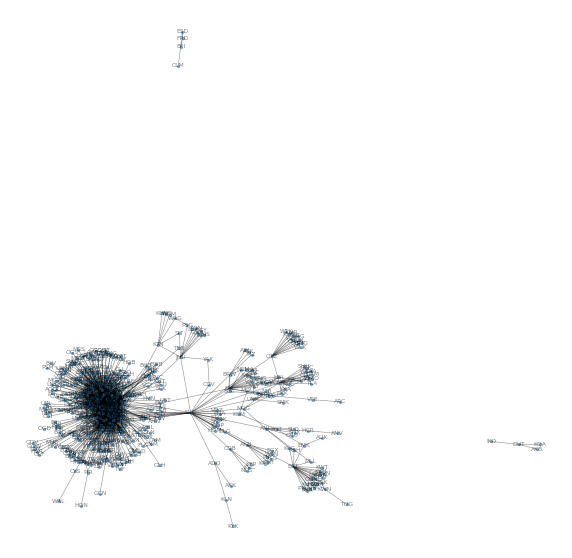

In [6]:
g = nx.from_edgelist(edges)
len(g.nodes()), len(g.edges())
fig, ax = plt.subplots(1, 1, figsize=(10,10))
nx.draw_networkx(g, ax=ax, node_size=5,
                 font_size=6, alpha=.5,
                 width=.5)
ax.set_axis_off()


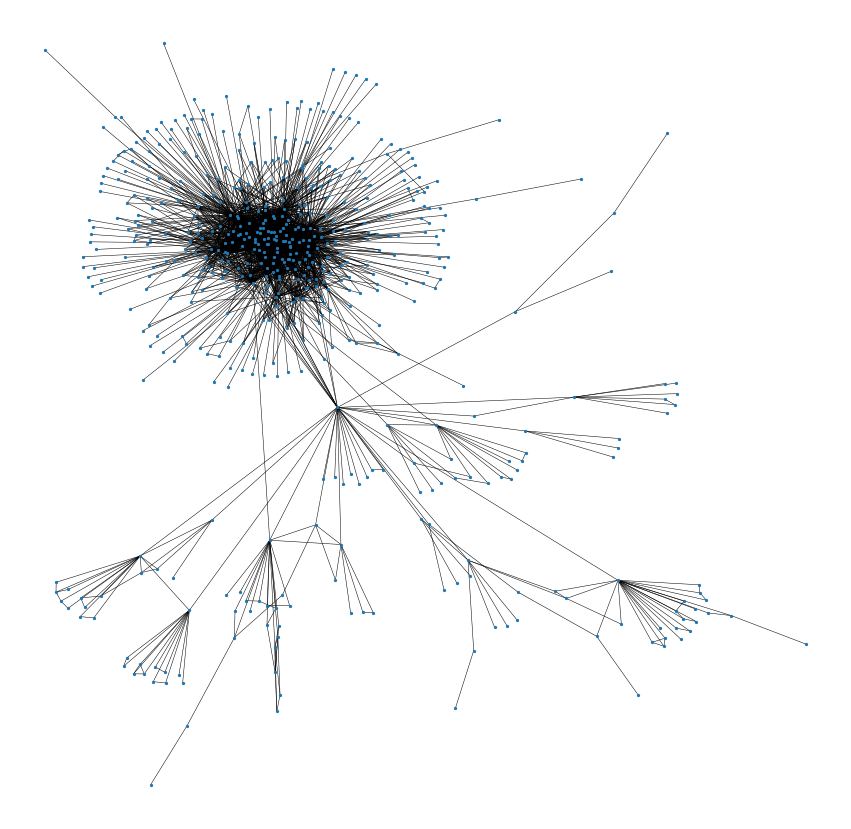

In [7]:
sg = next(nx.connected_component_subgraphs(g))
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
nx.draw_networkx(sg, ax=ax, with_labels=False,
                 node_size=5, width=.5)
ax.set_axis_off()

<h3>Plotting the routes</h3>

We plot the routes below. 

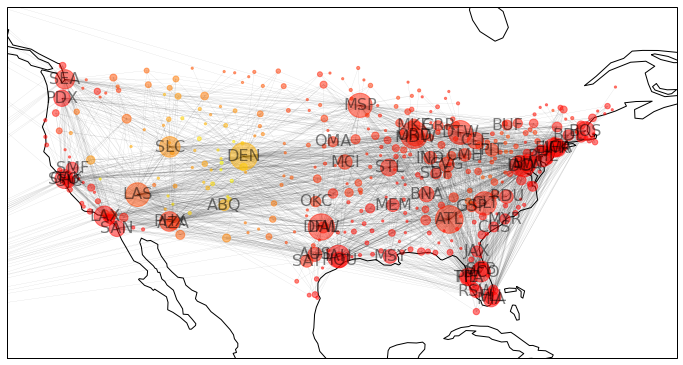

In [8]:
airports_us.set_index('id')
pos = {airport: (v['lon'], v['lat'])
       for airport, v in
       airports_us.to_dict('index').items()}

deg = nx.degree(sg)
sizes = [5 * deg[iata] for iata in sg.nodes]

altitude = airports_us['alt']
altitude = [altitude[iata] for iata in sg.nodes]

labels = {iata: iata if deg[iata] >= 20 else ''
          for iata in sg.nodes}

# Map projection
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(
    1, 1, figsize=(12,12),
    subplot_kw=dict(projection=crs))
ax.coastlines()
# Extent of continental US.
ax.set_extent([-128, -62, 20, 50])
nx.draw_networkx(sg, ax=ax,
                 font_size=16,
                 alpha=.5,
                 width=.075,
                 node_size=sizes,
                 labels=labels,
                 pos=pos,
                 node_color=altitude,
                 cmap=plt.cm.autumn)

<h4>Degree and Eigen Centrality</h4>

Degree centrality of a node is simply its degree—the number of edges it has. The higher the degree, the more central the node is. This can be an effective measure, since many nodes with high degrees also have high centrality by other measures. A node with 10 edges have degree centrality of 10. A node with 1 edge would has a degree centrality of 1. Higher values mean that the node is more central.

Eigen centrality is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

We will split the dataset into multiple datasets based on timezone, one for each timezone. 

In [9]:
cf = pd.DataFrame()
cf['eig_centrality'] = nx.eigenvector_centrality(g).values()
cf['deg_centrality'] = nx.degree_centrality(g).values()
cf.index = list(g)
cf.sort_values(by=['eig_centrality','deg_centrality'],ascending=False)
cf

,eig_centrality,deg_centrality
ADQ,6.693901e-04,0.005474
KLN,1.442053e-05,0.003650
KYK,3.104363e-07,0.001825
BRL,6.829614e-03,0.003650
ORD,1.927658e-01,0.271898
STL,1.244298e-01,0.102190
DEC,6.829614e-03,0.003650
JBR,2.679020e-03,0.001825
KTN,2.749174e-03,0.012774
MTM,5.919369e-05,0.001825


In [10]:
Eastern = data[data['tz']=='Eastern']
Central = data[data['tz']=='Central']
Mountain = data[data['tz']=='Mountain']
Pacific = data[data['tz']=='Pacific']
Alaska = data[data['tz']=='Alaska']
Hawaii = data[data['tz']=='Hawaii']


<h4>Degree and Eigen Centrality For Eastern</h4>

In [11]:
Eastern.head()
edges = Eastern[['source_x', 'dest']].values
Easterng = nx.from_edgelist(edges)

easternValues = pd.DataFrame()
easternValues['eigen'] = nx.eigenvector_centrality(Easterng).values()
easternValues['degree'] = nx.degree_centrality(Easterng).values()
easternValues.index = list(Easterng)
easternValues.sort_values(by=['degree','degree'],ascending=False)


,eigen,degree
ATL,0.233211,0.651064
DTW,0.218624,0.485106
CLT,0.215649,0.468085
PHL,0.199222,0.370213
DCA,0.192015,0.361702
IAD,0.175846,0.340426
MCO,0.181401,0.314894
ORD,0.159667,0.306383
EWR,0.183688,0.306383
BOS,0.170334,0.297872


<h4>Degree and Eigen Centrality For Central</h4>

In [12]:
Central.head()
edges = Central[['source_x', 'dest']].values
Centralg = nx.from_edgelist(edges)


centralValues = pd.DataFrame()
centralValues['eigen'] = nx.eigenvector_centrality(Centralg).values()
centralValues['degree'] = nx.degree_centrality(Centralg).values()
centralValues.index = list(Centralg)
centralValues.sort_values(by=['eigen','degree'],ascending=False)


,eigen,degree
DFW,0.284566,0.539370
ORD,0.280790,0.578740
MSP,0.255211,0.456693
IAH,0.250004,0.393701
STL,0.189629,0.220472
MDW,0.187401,0.263780
BNA,0.171948,0.177165
MCI,0.166691,0.161417
MSY,0.166326,0.149606
HOU,0.155709,0.185039


<h4>Degree and Eigen Centrality For Pacific</h4>

In [13]:
Pacific.head()
edges = Pacific[['source_x', 'dest']].values
Pacificg = nx.from_edgelist(edges)
 


PacificValues = pd.DataFrame()
PacificValues['eigen'] = nx.eigenvector_centrality(Pacificg).values()
PacificValues['degree'] = nx.degree_centrality(Pacificg).values()
PacificValues.index = list(Pacificg)
PacificValues.sort_values(by=['eigen','degree'],ascending=False)

,eigen,degree
LAS,3.181154e-01,0.719745
LAX,2.909434e-01,0.535032
SEA,2.904045e-01,0.477707
SFO,2.720358e-01,0.445860
PDX,2.530050e-01,0.337580
SAN,2.329681e-01,0.312102
SMF,1.740446e-01,0.178344
OAK,1.678327e-01,0.197452
SJC,1.621143e-01,0.171975
DEN,1.486012e-01,0.146497


<h4>Degree and Eigen Centrality For Mountain</h4>

In [14]:
Mountain.head()
edges = Pacific[['source_x', 'dest']].values
Mountaing = nx.from_edgelist(edges)
 


MountainValues = pd.DataFrame()
MountainValues['eigen'] = nx.eigenvector_centrality(Mountaing).values()
MountainValues['degree'] = nx.degree_centrality(Mountaing).values()
MountainValues.index = list(Pacificg)
MountainValues.sort_values(by=['eigen','degree'],ascending=False)

,eigen,degree
LAS,3.181154e-01,0.719745
LAX,2.909434e-01,0.535032
SEA,2.904045e-01,0.477707
SFO,2.720358e-01,0.445860
PDX,2.530050e-01,0.337580
SAN,2.329681e-01,0.312102
SMF,1.740446e-01,0.178344
OAK,1.678327e-01,0.197452
SJC,1.621143e-01,0.171975
DEN,1.486012e-01,0.146497


<h3>Comparing Centrality</h3>

We will use  t-test to compare centrality. 

<h3>T- Test</h3>

The t test (also called Student’s T Test) compares two averages (means) and tells you if they are different from each other. The t test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance.

<h3>T-score</h3>
The t score is a ratio between the difference between two groups and the difference within the groups
A large t-score tells you that the groups are different.
A small t-score tells you that the groups are similar.

<h3>Eastern vs Central</h3>

Based pvalue for Eigen centrality, we can not reject the null hypothesis(that is mean is same for the both groups).
An airport with few connections could have a very high eigenvector centrality if those few connections were to very well-connected others. 

In [15]:
ec = stats.ttest_ind(easternValues['eigen'], centralValues['eigen'])
ec

Ttest_indResult(statistic=0.28785455926947423, pvalue=0.7735800283281259)

P-value for degree centrality is really low. We could verify this also based on the picture above; most of the airports and routes are on the east coast. 

In [16]:
ec = stats.ttest_ind(easternValues['degree'], centralValues['degree'])
ec

Ttest_indResult(statistic=2.8601056735380332, pvalue=0.004416140167267751)

<h3>Eastern vs Pacific</h3>

Eigen centrality for thesee two groups are not the same but degree centrality is is the same.
We can also verify this by examining the routes-airports map above, most of the airports and routes are on the east and west coast.  

In [17]:
ep = stats.ttest_ind(easternValues['eigen'], PacificValues['eigen'])
ep

Ttest_indResult(statistic=-2.1919307454021784, pvalue=0.028972036865678872)

In [18]:
ec = stats.ttest_ind(easternValues['degree'], PacificValues['degree'])
ec

Ttest_indResult(statistic=0.8909189688256665, pvalue=0.3735191287103774)

<h3>Eastern vs Mountain</h3>

Based on the p-values below, we reject the null hypothis for both Eigen and Degree centrality.
Based map above, we see there alot more airports and route on the east coast as compared to the middle of the country.


In [19]:
em = stats.ttest_ind(easternValues['eigen'], MountainValues['eigen'])
ep

Ttest_indResult(statistic=-2.1919307454021784, pvalue=0.028972036865678872)

In [20]:
em = stats.ttest_ind(easternValues['degree'], MountainValues['degree'])
ep

Ttest_indResult(statistic=-2.1919307454021784, pvalue=0.028972036865678872)